Author: WenJun Cen <br>
File: US Natural Disaster - Kaggle

## Information about data
- The dataset contains information about historal data on the declaration of natural disaster. The dataset documents the date and duration, types of disasters, and government assistances.

## Goals in analysis
- The goal in analyze the dataset is to find patterns in the past and see the frequency and durations of the different types of disaster. In understanding the trends of the past will allow better preparation of disasters in the future.

## Dataset Variables
- fema_declaration_string: Agency standard method for uniquely identifying Stafford Act declarations. Concatenation of declaration_type, disaster_number and state.
- disaster_number: Sequentially assigned number used to designate an event or incident declared as a disaster.
- state: US state, district, or territory.
- declaration_type: One of "DR" (= major disaster), "EM" (= emergency management), or "FM" (= "fire management") declaration_date: Date the disaster was declared.
- fy_declared: Fiscal year in which the disaster was declared.
- incident_type: Type of incident such as "Fire", "Flood", or "Hurricane". The incident type will affect the types of assistance available.
- declaration_title: Title for the disaster. This can be a useful identifier such as "Hurricane Katrina" or "Covid-19 Pandemic".
- ih_program_declared: Binary flag indicating whether the "Individuals and Households program" was declared for this disaster.
- ia_program_declared: Binary flag indicating whether the "Individual Assistance program" was declared for this disaster.
- pa_program_declared: Binary flag indicating whether the "Public Assistance program" was declared for this disaster.
- hm_program_declared: Binary flag indicating whether the "Hazard Mitigation program" was declared for this disaster.
- incident_begin_date: Date the incident itself began.
- incident_end_date: Date the incident itself ended. This feature has about 14% NA entries.
- disaster_closeout_date: Date all financial transactions for all programs are completed. This column has 98% NA entries.
- fips: 5-digit FIPS county code; used to identify counties and county equivalents in the United States, the District of Columbia, US territories, outlying areas of the US and freely associated states. Concatenated from the 2 source columns "fipsStateCode" and "fipsCountyCode".
- place_code: A unique code system FEMA uses internally to recognize locations that takes the numbers '99' + the 3-digit county FIPS code. There are some declared locations that don't have recognized FIPS county codes in which case a unique identifier was assigned.
- designated_area: The name or phrase describing the U.S. county that was included in the declaration. Can take the value "Statewide".
- declaration_request_number: Unique ID assigned to request for a disaster declaration.
- hash: MD5 Hash of the fields and values of the record.
- last_refresh: Date the record was last updated by FEMA.
- id: Unique ID assigned to the record. Those last 4 columns are primarily for bookkeeping.

## Dataset origin

- The dataset is originates from Kaggle US Natural Disaster dataset, and is derived from the FEMA website.

## 1. Import data & Data Cleaning

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [179]:
pd.set_option('display.max_columns', 500)
disaster = pd.read_csv('us_disaster_declarations.csv')
disaster.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T04:00:00Z,1953,Tornado,Tornado,0,1,1,1,1953-05-02T04:00:00Z,1953-05-02T04:00:00Z,NaN,13000,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602bf
1,DR-2-TX,2,TX,DR,1953-05-15T04:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,1,1,1953-05-15T04:00:00Z,1953-05-15T04:00:00Z,NaN,48000,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c3
2,DR-3-LA,3,LA,DR,1953-05-29T04:00:00Z,1953,Flood,Flood,0,1,1,1,1953-05-29T04:00:00Z,1953-05-29T04:00:00Z,NaN,22000,0,Statewide,53005,745948932fd77a7c6dcd4de7059ff080,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c1
3,DR-4-MI,4,MI,DR,1953-06-02T04:00:00Z,1953,Tornado,Tornado,0,1,1,1,1953-06-02T04:00:00Z,1953-06-02T04:00:00Z,NaN,26000,0,Statewide,53004,8c9dee13124e36a9dfe2eb74e33fafad,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c0
4,DR-5-MT,5,MT,DR,1953-06-06T04:00:00Z,1953,Flood,Floods,0,1,1,1,1953-06-06T04:00:00Z,1953-06-06T04:00:00Z,NaN,30000,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c7


### Rows and Columns

In [97]:
disaster.shape

(58936, 22)

### Drop Duplicates Rows

In [182]:
disaster = disaster.drop_duplicates()

### Null Values

In [183]:
disaster.isnull().sum()

fema_declaration_string           0
disaster_number                   0
state                             0
declaration_type                  0
declaration_date                  0
fy_declared                       0
incident_type                     0
declaration_title                 0
ih_program_declared               0
ia_program_declared               0
pa_program_declared               0
hm_program_declared               0
incident_begin_date               0
incident_end_date              8026
disaster_closeout_date        57778
fips                              0
place_code                        0
designated_area                   0
declaration_request_number        0
hash                             75
last_refresh                      0
id                                0
dtype: int64

### Data Types

In [184]:
disaster.dtypes

fema_declaration_string       object
disaster_number                int64
state                         object
declaration_type              object
declaration_date              object
fy_declared                    int64
incident_type                 object
declaration_title             object
ih_program_declared            int64
ia_program_declared            int64
pa_program_declared            int64
hm_program_declared            int64
incident_begin_date           object
incident_end_date             object
disaster_closeout_date        object
fips                           int64
place_code                     int64
designated_area               object
declaration_request_number     int64
hash                          object
last_refresh                  object
id                            object
dtype: object

### Summary Statistics

In [185]:
disaster.describe()

,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
count,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000,58936.000000
mean,2435.195619,2002.866652,0.114904,0.291621,0.930077,0.352891,31747.716896,96363.772618,36243.623456
std,1367.715197,14.517088,0.318909,0.454513,0.255020,0.477873,16562.781508,14134.247698,36198.966481
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.000000
25%,1239.000000,1996.000000,0.000000,0.000000,1.000000,0.000000,19165.000000,99029.000000,8063.750000
50%,2185.500000,2005.000000,0.000000,0.000000,1.000000,0.000000,30065.000000,99073.000000,18113.000000
75%,3441.000000,2014.000000,0.000000,1.000000,1.000000,1.000000,46071.000000,99125.000000,76064.000000
max,5306.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,78030.000000,99507.000000,99159.000000


### Drop unnecessary columns

In [186]:
disaster.drop(columns=['fema_declaration_string', 'fips', 'place_code', 
                        'declaration_request_number', 'hash', 'last_refresh',
                        'id'], inplace=True)

In [187]:
disaster.head()

,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,incident_end_date,disaster_closeout_date,designated_area
0,1,GA,DR,1953-05-02T04:00:00Z,1953,Tornado,Tornado,0,1,1,1,1953-05-02T04:00:00Z,1953-05-02T04:00:00Z,NaN,Statewide
1,2,TX,DR,1953-05-15T04:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,1,1,1953-05-15T04:00:00Z,1953-05-15T04:00:00Z,NaN,Statewide
2,3,LA,DR,1953-05-29T04:00:00Z,1953,Flood,Flood,0,1,1,1,1953-05-29T04:00:00Z,1953-05-29T04:00:00Z,NaN,Statewide
3,4,MI,DR,1953-06-02T04:00:00Z,1953,Tornado,Tornado,0,1,1,1,1953-06-02T04:00:00Z,1953-06-02T04:00:00Z,NaN,Statewide
4,5,MT,DR,1953-06-06T04:00:00Z,1953,Flood,Floods,0,1,1,1,1953-06-06T04:00:00Z,1953-06-06T04:00:00Z,NaN,Statewide


### Append new columns to identify official states and US commonwealth or territories

In [188]:
# There are more than 50 states in the dataset
len(disaster.state.unique())

59

In [189]:
usTerritory = ['AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PW', 'PR', 'VI']

In [190]:
states = []
for item in [state for state in disaster.state.unique() if state not in usTerritory]:
    states.append(item)
print(states)
len(states)

['GA', 'TX', 'LA', 'MI', 'MT', 'IA', 'MA', 'NH', 'FL', 'AK', 'MS', 'CA', 'NV', 'SD', 'WV', 'RI', 'ME', 'CT', 'NY', 'NM', 'NC', 'SC', 'IN', 'HI', 'CO', 'KS', 'OK', 'PA', 'NJ', 'OR', 'WA', 'ID', 'OH', 'KY', 'VA', 'MO', 'AR', 'IL', 'ND', 'MN', 'NE', 'AL', 'MD', 'DE', 'TN', 'WY', 'VT', 'WI', 'AZ', 'UT']


50

In [191]:
# Appending the state identifier
disaster.loc[disaster.state.isin(usTerritory), 'state_Identifier'] = 'Territory'
disaster.loc[~disaster.state.isin(usTerritory), 'state_Identifier'] = 'Official State'

In [234]:
states_abb = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [240]:
disaster.loc[:,'statesName'] = disaster.state.map(states_abb)

In [400]:
disaster.head()

,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,incident_end_date,disaster_closeout_date,designated_area,state_Identifier,statesName
0,1,GA,DR,1953-05-02 04:00:00+00:00,1953,Tornado,Tornado,0,1,1,1,1953-05-02 04:00:00+00:00,1953-05-02 04:00:00+00:00,NaT,Statewide,Official State,Georgia
1,2,TX,DR,1953-05-15 04:00:00+00:00,1953,Tornado,Tornado & Heavy Rainfall,0,1,1,1,1953-05-15 04:00:00+00:00,1953-05-15 04:00:00+00:00,NaT,Statewide,Official State,Texas
2,3,LA,DR,1953-05-29 04:00:00+00:00,1953,Flood,Flood,0,1,1,1,1953-05-29 04:00:00+00:00,1953-05-29 04:00:00+00:00,NaT,Statewide,Official State,Louisiana
3,4,MI,DR,1953-06-02 04:00:00+00:00,1953,Tornado,Tornado,0,1,1,1,1953-06-02 04:00:00+00:00,1953-06-02 04:00:00+00:00,NaT,Statewide,Official State,Michigan
4,5,MT,DR,1953-06-06 04:00:00+00:00,1953,Flood,Floods,0,1,1,1,1953-06-06 04:00:00+00:00,1953-06-06 04:00:00+00:00,NaT,Statewide,Official State,Montana


### Convert date & time to datetime type

In [192]:
date_Datatypes = ['declaration_date', 'incident_begin_date', 'incident_end_date', 'disaster_closeout_date']

In [193]:
for date in date_Datatypes:
    disaster[date] = pd.to_datetime(disaster[date], errors='ignore')

In [194]:
disaster.dtypes

disaster_number                         int64
state                                  object
declaration_type                       object
declaration_date          datetime64[ns, UTC]
fy_declared                             int64
incident_type                          object
declaration_title                      object
ih_program_declared                     int64
ia_program_declared                     int64
pa_program_declared                     int64
hm_program_declared                     int64
incident_begin_date       datetime64[ns, UTC]
incident_end_date         datetime64[ns, UTC]
disaster_closeout_date    datetime64[ns, UTC]
designated_area                        object
state_Identifier                       object
dtype: object

# 2. Exploratory Data Analysis

## EDA on incident

### Which incident type occurred the most?

In [195]:
incident_type_counts = disaster.incident_type.value_counts()
incident_type_counts

Severe Storm(s)     16740
Hurricane           10876
Flood               10360
Biological           7622
Snow                 3659
Fire                 3317
Severe Ice Storm     1990
Tornado              1452
Drought              1292
Coastal Storm         507
Freezing              301
Other                 297
Earthquake            224
Typhoon               130
Volcano                51
Fishing Losses         42
Mud/Landslide          31
Chemical                9
Tsunami                 9
Toxic Substances        9
Human Cause             7
Dam/Levee Break         6
Terrorist               5
Name: incident_type, dtype: int64

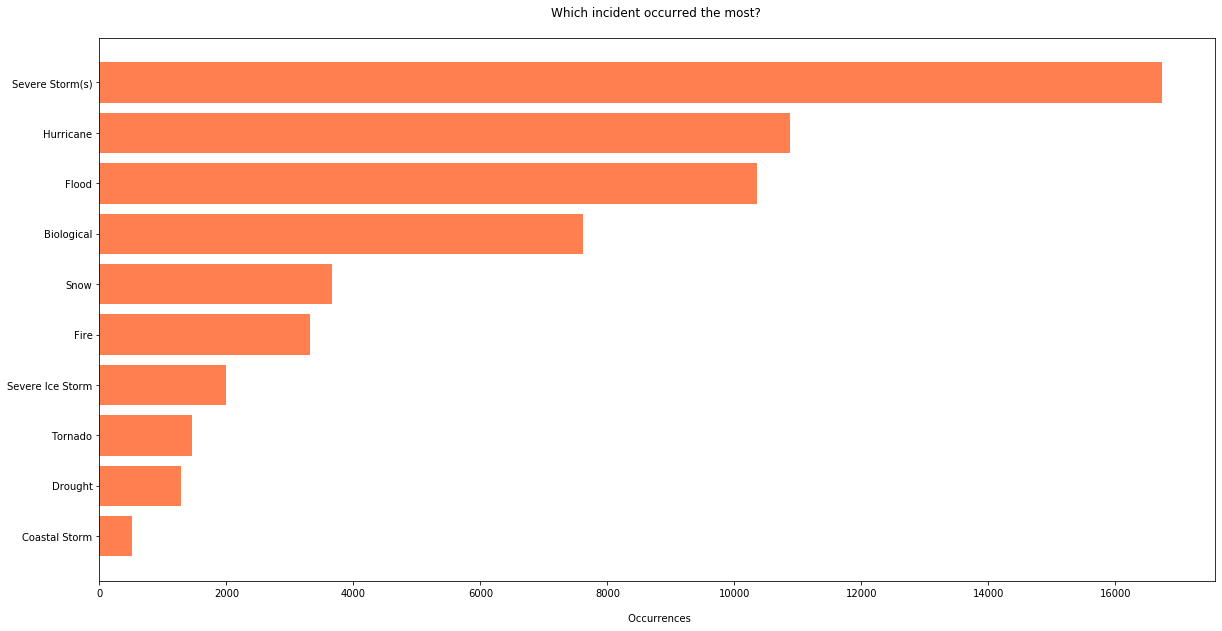

In [197]:
fig, ax = plt.subplots(1, figsize=(20,10))

y_ticks = disaster.incident_type.value_counts().index
y_pos = np.arange(10)
x_counts = incident_type_counts[0:10]

plt.barh(y_pos, x_counts, color='coral')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_ticks)
ax.invert_yaxis()
ax.set_xlabel('\n Occurrences')
ax.set_title('Which incident occurred the most? \n')

plt.show()

### Within the top 3 incident declared, what are the top 3 states?

In [529]:
top3_incidents = incident_type_counts.index[0:3]
top3_incidents = disaster.loc[disaster.incident_type.isin(top3_incidents)]
top3_incidents.groupby(['incident_type'])['state'].apply(lambda x: x.value_counts().nlargest(3))

incident_type      
Flood            IA     722
                 MN     642
                 ND     632
Hurricane        TX    1204
                 NC    1075
                 FL     930
Severe Storm(s)  MO    1291
                 OK     998
                 KS     975
Name: state, dtype: int64

### Within the top 3 incident, how many are official vs. territories?

In [473]:
top3_incidents.groupby(['incident_type'])['state_Identifier'].value_counts().unstack()

state_Identifier,Official State,Territory
incident_type,,
Flood,9984,376
Hurricane,10016,860
Severe Storm(s),16412,328


### Which 10 states experienced the most drought?

In [471]:
disaster.loc[disaster.incident_type == 'Drought'].groupby('state').disaster_number.count().sort_values(ascending=False).head(10)

state
TX    149
GA    144
VA    100
MO     94
MN     78
AL     67
WI     66
SD     62
NC     49
CA     47
Name: disaster_number, dtype: int64

## EDA on declaration types 
### What is the distribution of declaration type?

In [327]:
declaration_type_counts = disaster.declaration_type.value_counts()
total = sum(declaration_type_counts)

for dType, value_count in zip(declaration_type_counts.index, declaration_type_counts):
    print(f'{dType} consists {value_count / total * 100 :.2f}% of all occurrences')

DR consists 68.65% of all occurrences
EM consists 28.51% of all occurrences
FM consists 2.84% of all occurrences


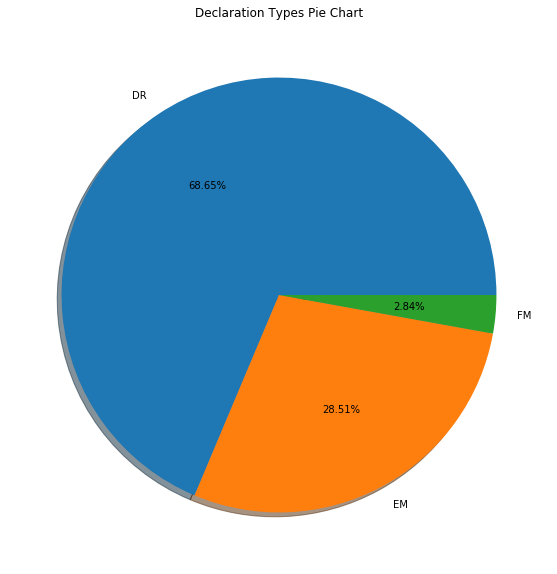

In [226]:
fig, ax = plt.subplots(1, figsize=(20,10))

labels = declaration_type_counts.index

ax.pie(declaration_type_counts, labels=labels, autopct='%2.2f%%', shadow=True)

ax.set_title('Declaration Types Pie Chart')
plt.show()

## State EDA

### Top 10 state with the highest declared cases?

In [248]:
top10_States = disaster.groupby('statesName')['statesName'].count().sort_values(ascending=False).head(10)
top10_States

statesName
Texas             4561
Missouri          2652
Virginia          2460
Kentucky          2389
Oklahoma          2278
Georgia           2240
Florida           1959
North Carolina    1829
Iowa              1799
Puerto Rico       1734
Name: statesName, dtype: int64

### Within the 10 states, what are the top 3 incidents delcared?

In [439]:
top3_Incidents_top10States = disaster.loc[disaster.statesName.isin(top10_States.index)]
top3_Incidents_top10States = top3_Incidents_top10States.groupby(['statesName','incident_type']).size().reset_index()
top3_Incidents_top10States.groupby('statesName')['statesName', 'incident_type',0].head(3).sort_values(by=['statesName',0],ascending=False)

,statesName,incident_type,0
84,Virginia,Biological,276
85,Virginia,Drought,100
86,Virginia,Earthquake,10
73,Texas,Biological,517
75,Texas,Drought,149
74,Texas,Coastal Storm,42
65,Puerto Rico,Biological,156
67,Puerto Rico,Earthquake,111
66,Puerto Rico,Drought,25
56,Oklahoma,Biological,234


### What are the top 3 incidents in commonwealth & territories?

In [463]:
disaster.loc[disaster.state_Identifier == 'Territory'].groupby('state_Identifier').incident_type.value_counts().head(3)

state_Identifier  incident_type  
Territory         Hurricane          860
                  Flood              376
                  Severe Storm(s)    328
Name: incident_type, dtype: int64

## Government Assistances EDA
### What percentage of each government assistances were declared since 1953

In [333]:
gov_assists = ['ih_program_declared', 'ia_program_declared', 'pa_program_declared', 'hm_program_declared']
gov_assist_names = ["Individuals and Households program", "Individual Assistance program", 
                    "Public Assistance program","Hazard Mitigation program"]

for gov_assist, gov_assist_name in zip(gov_assists, gov_assist_names):
    gov_assist = disaster[gov_assist]
    print(f'{gov_assist_name} were declared in {100 * np.mean(gov_assist):.2f}% of the occurrences.')

Individuals and Households program were declared in 11.49% of the occurrences.
Individual Assistance program were declared in 29.16% of the occurrences.
Public Assistance program were declared in 93.01% of the occurrences.
Hazard Mitigation program were declared in 35.29% of the occurrences.


### Which year had the highest government assistance programs

In [411]:
for gov_assist in gov_assists:
    print(disaster.groupby('fy_declared')[gov_assist].mean().sort_values(ascending=False).head(3).reset_index())

   fy_declared  ih_program_declared
0         2004             0.549102
1         2003             0.522262
2         2008             0.260993
   fy_declared  ia_program_declared
0         1953                  1.0
1         1961                  1.0
2         1969                  1.0
   fy_declared  pa_program_declared
0         1953                  1.0
1         1963                  1.0
2         1970                  1.0
   fy_declared  hm_program_declared
0         1953                  1.0
1         1960                  1.0
2         1956                  1.0


### Which state had the highest government assistance programs

In [370]:
for gov_assist in gov_assists:
    print(disaster.groupby('state')[gov_assist].mean().sort_values(ascending=False).head(3).reset_index())

  state  ih_program_declared
0    IN             0.246556
1    AS             0.228571
2    FL             0.211843
  state  ia_program_declared
0    PW             1.000000
1    AS             0.571429
2    GU             0.526316
  state  pa_program_declared
0    MP                  1.0
1    PW                  1.0
2    DC                  1.0
  state  hm_program_declared
0    VT             0.542857
1    NE             0.531601
2    GU             0.526316


## EDA on time
### What is the average duration for the types of incident?

In [490]:
disaster['duration'] = disaster.incident_end_date - disaster.incident_begin_date

In [524]:
duration = disaster.loc[~disaster.duration.isnull()]
duration.groupby('incident_type')['duration'].apply(lambda x: np.mean(x)).sort_values(ascending=False)

incident_type
Toxic Substances   117 days 20:13:13.333333
Volcano            106 days 09:45:50.588235
Fishing Losses      78 days 10:42:51.428571
Fire                69 days 03:30:48.884509
Other               45 days 05:06:26.565656
Earthquake          37 days 04:13:36.160714
Coastal Storm       26 days 05:07:27.185770
Flood               25 days 14:41:23.552316
Severe Storm(s)     24 days 17:59:40.960568
Freezing            23 days 23:08:52.823920
Hurricane           20 days 21:45:20.119827
Mud/Landslide       18 days 21:35:32.903225
Dam/Levee Break            14 days 12:47:30
Drought             12 days 14:33:48.482972
Severe Ice Storm    10 days 23:20:29.068341
Chemical                   10 days 06:00:00
Tornado              5 days 17:50:08.911157
Terrorist                   5 days 12:36:00
Snow                 4 days 09:28:22.064771
Typhoon              2 days 00:16:53.307692
Tsunami              0 days 00:43:44.666666
Human Cause                 0 days 00:00:00
Name: duration, dt

### What incident had the longest duration?
### What is this incident?

In [555]:
duration.groupby('incident_type')['duration'].apply(lambda x: max(x)).sort_values(ascending=False).dt.days

incident_type
Volcano             5117
Fire                1132
Toxic Substances     842
Earthquake           317
Mud/Landslide        257
Drought              241
Flood                230
Fishing Losses       183
Severe Storm(s)      182
Freezing             165
Other                163
Snow                  94
Severe Ice Storm      89
Coastal Storm         68
Hurricane             67
Tornado               44
Dam/Levee Break       38
Chemical              10
Typhoon                7
Terrorist              7
Tsunami                0
Human Cause            0
Name: duration, dtype: int64

In [558]:
duration.loc[duration.duration == '5117 days']

,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,incident_end_date,disaster_closeout_date,designated_area,state_Identifier,statesName,duration
9800,864,HI,DR,1990-05-18 04:00:00+00:00,1990,Volcano,"Lava Flow, Kilauea Volcano",0,1,1,0,1983-01-24 05:00:00+00:00,1997-01-27 05:00:00+00:00,NaT,Hawaii (County),Official State,Hawaii,5117 days


### Time series on the numer of incident declared every year

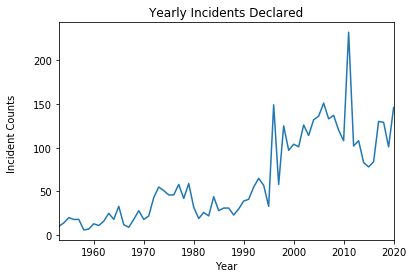

In [551]:
# Need to drop declared cases if they are duplicates, based on the subset condition
ax = disaster.drop_duplicates(subset=['state','incident_begin_date',
                                      'declaration_title','duration']).groupby('fy_declared').incident_type.count().plot()
ax.set_ylabel('Incident Counts \n')
ax.set_xlabel('Year')
ax.set_title('Yearly Incidents Declared')
plt.show()